# Hoja de trabajo 1

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plot
from gradient_descent import gradient_descent
from linear_cost import linear_cost
from linear_cost_derivate import linear_cost_derivate

In [170]:
#importar el dataset de entrenamiento
csv = pd.read_csv('Admission_Predict.csv')
dataset = pd.read_csv('Admission_Predict.csv', usecols=['GRE Score', 'TOEFL Score', 'Chance of Admit '])
dataset.head()

data = dataset.iloc[:len(dataset), 0:3].values

# Análisis de los datos

Se analizara la correlación de las variables, con un heatmap comparando todas las variables contra todas.

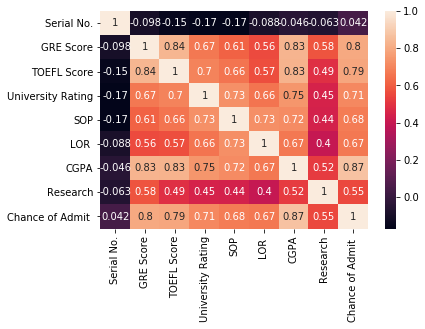

In [10]:
sns.heatmap(csv.corr(),annot=True)

En el heatmap se puede apreciar la correlación de cada una de las variables contra todas, como nuestra variable con la que queremos comparar es "Chance of Admit" las variables que mejor correlación tienen contra esta son "GRE Score", "TOEFL Score" y "CGPA". Por lo tanto se utilizaran las tres variables como features para realizar la regresión

# GRE Score vs Chance of Admit

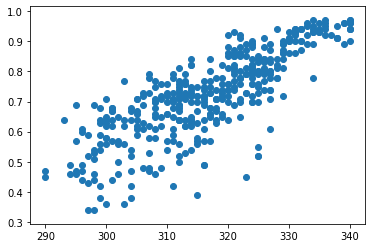

In [34]:
data1 = pd.read_csv('Admission_Predict.csv', usecols=['GRE Score', 'Chance of Admit '])
gre = (data1.iloc[:len(data1), 0].values ) 
ca = data1.iloc[:len(data1), 1].values.reshape(-1,1)
plot.scatter(gre, ca)

# TOEFL Score vs Chance of Admit

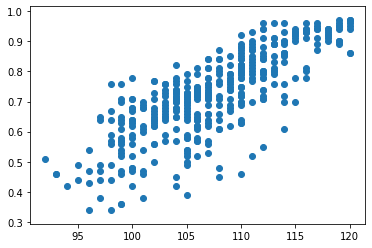

In [41]:
data1 = pd.read_csv('Admission_Predict.csv', usecols=['TOEFL Score', 'Chance of Admit '])
toe = (data1.iloc[:len(data1), 0].values)
ca = data1.iloc[:len(data1), 1].values.reshape(-1,1)
plot.scatter(toe, ca)

# CGPA vs Chance of Admit

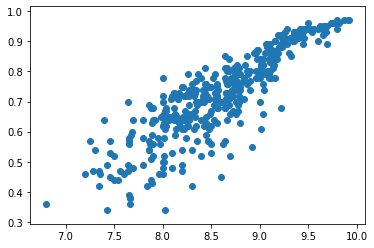

In [44]:
data1 = pd.read_csv('Admission_Predict.csv', usecols=['CGPA', 'Chance of Admit '])
cgpa = (data1.iloc[:len(data1), 0].values 
ca = data1.iloc[:len(data1), 1].values.reshape(-1,1)
plot.scatter(cgpa, ca)

De los datos gráficados anteriormente se puede ver que efectivamente CGPA es la que cuenta con un comportamiento más lineal es CGPA, la que le segui es GRE y por último se encuentra TOEFL. La única ventaja de toefl es que pareciera seguir más una tendencia linea, lo único que sus datos se encuentran dispersos. Para la regularización bien se podría manipular estos datos para que a medida que aumenten estos se vayan juntando. Por lo que considero que utilizar TOEFL en lugar de CGPA podría resultar en una mejor predicción.

# Division de los datos

Los datos se dividiran en test y en train, para analizar el comportamiento de ellos y poder transformar los datos y obtener una mejor regresión lineal. Los datos se divieron en 60% de ellos en train y el resto en test. 

In [47]:
import random

trainingNumber = 0.6
cvNumber = 0.20

random.shuffle(data)

a = int(len(data) * trainingNumber)
b = int(len(data) * cvNumber)

training = data[:a]
cv = data[a: a + b]
test = data[a + b:]

#training =  np.insert(training, 0, 1, axis = 1)
#test = np.insert(test, 0, 1, axis = 1)
training_y = training[:len(dataset), 2].reshape(-1,1)
test_y = test[:len(dataset), 2].reshape(-1,1)




In [194]:
X = (dataset.iloc[:len(dataset), 0].values )
X = X.reshape(-1,1)
X = np.insert(X, 0, (dataset.iloc[:len(dataset), 0].values ) , axis = 1)
X = np.insert(X, 0, 1, axis = 1)
y = dataset.iloc[:len(dataset), 2].values.reshape(-1,1)

In [195]:
m, n = X.shape

# Eleccion de theta 

Se eligira un theta que haga que la regresión se encuentre bien, los datos no fueron transformados y se coloco un lamda de 0 para que no haya regularización en esta parte de la elección del theta

In [196]:
theta_0 = np.random.rand(n, 1)
theta, costs, gradient_norms = gradient_descent(X, y, theta_0, linear_cost, linear_cost_derivate, alpha=0.000001, lamda = 0,treshold=0.0001, max_iter=10000)



In [197]:
print ('THETA', theta)

THETA [[ 0.20007117]
 [-0.03954362]
 [ 0.04120937]]


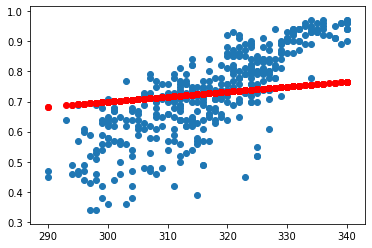

In [198]:
plot.scatter(X[:, 2], y)
plot.scatter(X[:, 2], np.matmul(X, theta), color='red')
plot.show()

# Eleccion de lambda

Para la elección de lambda se gráficaran los datos de test contra los de train, los datos de train no poseen ninguna transformación a cambio de los utilizados para obtener el theta. Esto para poder aplicar de mejor manera la regularización y ver si la transformación aplicada en el inciso anterior pudiese funcionar. 

In [22]:
cost_train = []
cost_cv = []

for i in range(0, 50, 5):
    cost_train.append(linear_cost(training, training_y, theta, i))
    cost_cv.append(linear_cost(test, test_y, theta, i))
    


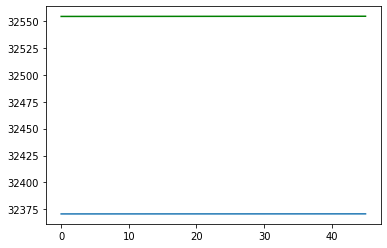

In [23]:
plot.plot(np.arange(0, 50, 5), cost_train)
plot.plot(np.arange(0, 50, 5), cost_cv, color="green")

En la gráfica anterior se puede observar que el modelo que se esta utilizando cuenta con Bias. Aplicaremos la misma transformación de los datos en nuestro conjunto de test para observar si mejora el modelo, de lo contrario utilizaremos un lambda alto para analizar como esta cambiando el modelo

# Regularizacion del método

Para aplicar la regularización se realizo una transformación de los datos dado a que estos contaban con bias y se eligio un lamda de 10 ya que el bais es muy grande, entonces entre más grande el lambda podremos bajar la regresión y aplanarla más

In [199]:
X = (dataset.iloc[:len(dataset), 0].values )
X = X.reshape(-1,1)
X = np.insert(X, 0, (dataset.iloc[:len(dataset), 0].values ** 2) / 1000 , axis = 1)
X = np.insert(X, 0, 1, axis = 1)
y = dataset.iloc[:len(dataset), 2].values.reshape(-1,1)

In [200]:
m, n = X.shape

En el siguiente paso se utiliza el mismo theta resultante de la regresión sin regularización, como theta inicial. De este modo nos aseguramos que la predicción puede ser mejor ya que tenemos un theta que ya apunto a cierta cantidad de puntos 

In [213]:

theta, costs, gradient_norms = gradient_descent(X, y, theta, linear_cost, linear_cost_derivate, alpha=0.000001, lamda=10,treshold=0.0001, max_iter=100000)

In [214]:
print ("THETA", theta)

THETA [[ 0.19291189]
 [ 0.02628921]
 [-0.00661895]]


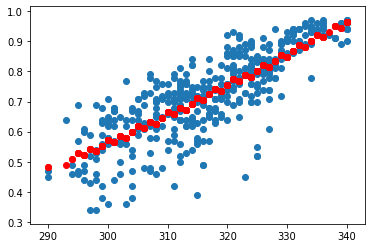

In [215]:
plot.scatter(X[:, 2], y)
plot.scatter(X[:, 2], np.matmul(X, theta), color='red')
plot.show()

En conclusión podemos observar que al transformar lo datos para que estuvieran más juntos los de toefl a medida que aumentan sirvio para la regularización y obtener una mejor regresión ya que la regresión se ve más en diagonal y le pego a más puntos que a diferencia de caundo no estaba regularizado ni transformados los datos. Al final no se utilizo el que tenia una correlación mayor con Chance of Admit. Considero que el lambda utilizado es bueno ya que no es un valor alto a comparación de la cantidad de baias que se tenia, ya que una combinación de aumentar la complejidad de los datos y un lambda alto fue lo mejor. 